In [3]:
from gensim import models
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#fichier sous la forme d'un dataframe

glove_model = models.KeyedVectors.load_word2vec_format("../data/tunning/glove.kv")
data = pd.DataFrame(glove_model.vectors)
data.index = glove_model.index_to_key 

X = data.values
#nombre d'observations n et de variables p
n = data.shape[0]
p = data.shape[1]

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components = 10)

pca.fit(X_scaled)
coord = pca.fit_transform(X_scaled)

FileNotFoundError: [Errno 2] No such file or directory: '../data/tunning/glove.kv'

### Analyse variance 

In [25]:
#variance expliquée
eigval = (n-1)/n*pca.explained_variance_
eigval

array([26.35648   ,  0.8530232 ,  0.68219143,  0.5061637 ,  0.37036496,
        0.2298812 ,  0.20696495,  0.10333753,  0.0837577 ,  0.07774901],
      dtype=float32)

In [53]:
#proportion de variance expliquée
prop_var=pca.explained_variance_ratio_
prop_var

array([0.8785502 , 0.02843413, 0.0227397 , 0.01687212, 0.01234553,
       0.00766271, 0.00689884, 0.00344459, 0.00279192, 0.00259161],
      dtype=float32)

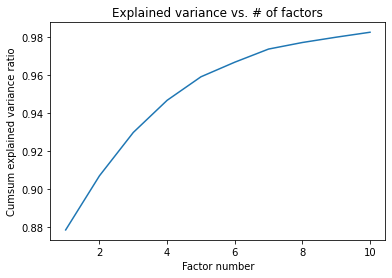

In [54]:
#cumul de variance expliquée
p=10
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

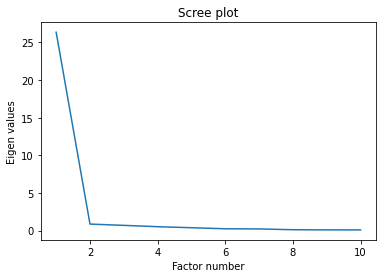

In [27]:
#scree plot
p=10
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

### on garde ??? dimensions

In [3]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components = 2)
reduc_glove_model = pca.fit_transform(X_scaled)

NameError: name 'X_scaled' is not defined

### Graphique

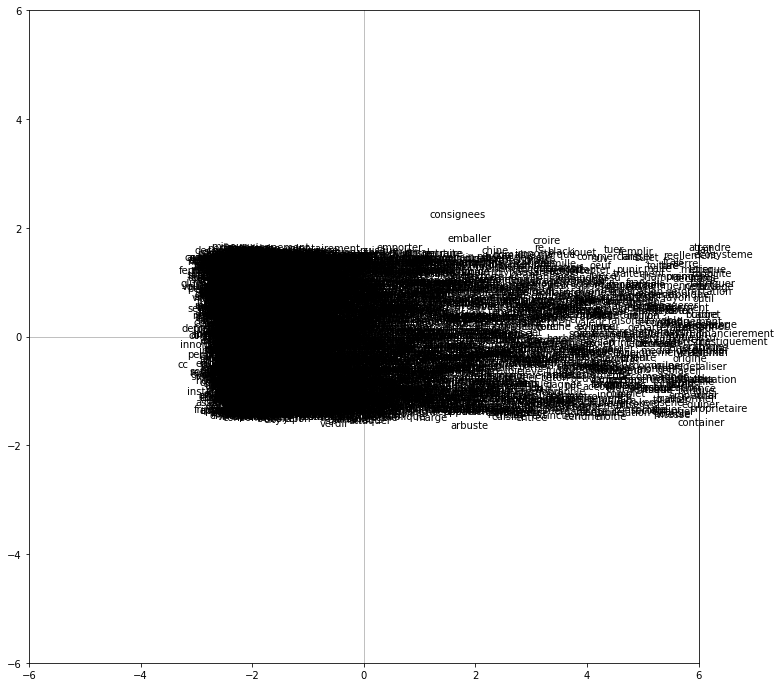

In [28]:
#Individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
 plt.annotate(data.index[i],(reduc_glove_model[i,0],reduc_glove_model[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()